In [ ]:
with open('queryresults-v2.csv', mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['param', 'data'])  # 写入表头

    for item in all_results:
        # 写入每行数据
        writer.writerow([item['param'], item['data']])

print("结果已保存到 query_results.csv")


In [28]:
import json

# 原始数据
# data = [
#     {'param': '65600975', 'data': [(155220641, 'huggingface/transformers', 532), (599547518, 'vllm-project/vllm', 312), (156939672, 'microsoft/onnxruntime', 227), (45717250, 'tensorflow/tensorflow', 211), (235860204, 'microsoft/DeepSpeed', 185), (494232964, 'Dao-AILab/flash-attention', 184), (612354784, 'ggerganov/llama.cpp', 179), (308638334, 'huggingface/accelerate', 172), (41881900, 'microsoft/vscode', 171), (23496542, 'openai/triton', 170)]},
#     {'param': '599547518', 'data': [(155220641, 'huggingface/transformers', 532), (646410686, 'hiyouga/LLaMA-Factory', 385), (679366051, 'NVIDIA/TensorRT-LLM', 338), (65600975, 'pytorch/pytorch', 312), (612354784, 'ggerganov/llama.cpp', 282), (547806116, 'huggingface/text-generation-inference', 262), (552661142, 'langchain-ai/langchain', 229), (740303686, 'sgl-project/sglang', 228), (654122609, 'InternLM/lmdeploy', 226), (615882673, 'lm-sys/FastChat', 219)]},
#     {'param': '155220641', 'data': [(65600975, 'pytorch/pytorch', 532), (599547518, 'vllm-project/vllm', 532), (308638334, 'huggingface/accelerate', 319), (570384908, 'huggingface/peft', 287), (235860204, 'microsoft/DeepSpeed', 279), (250510075, 'huggingface/trl', 273), (498011141, 'huggingface/diffusers', 260), (552661142, 'langchain-ai/langchain', 244), (612354784, 'ggerganov/llama.cpp', 242), (250213286, 'huggingface/datasets', 241)]},
#     {'param': '552661142', 'data': [(560704231, 'run-llama/llama_index', 476), (155220641, 'huggingface/transformers', 244), (598342280, 'langchain-ai/langchainjs', 243), (658928958, 'ollama/ollama', 230), (599547518, 'vllm-project/vllm', 229), (676672661, 'langchain-ai/langgraph', 170), (680120071, 'microsoft/autogen', 147), (671269505, 'BerriAI/litellm', 145), (612354784, 'ggerganov/llama.cpp', 140), (546206616, 'chroma-core/chroma', 134)]}
# ]

# 映射种子项目ID到名称
# project_mapping = {
#     '65600975': 'pytorch/pytorch',
#     '599547518': 'vllm-project/vllm',
#     '155220641': 'huggingface/transformers',
#     '552661142': 'langchain-ai/langchain'
# }

# 构建edges列表
edges = []

for item in data:
    seed_project_name = project_mapping[item['param']]
    for connection in item['data']:
        edges.append([connection[1], seed_project_name, connection[2]])

# 构建最终JSON结构
output = {"edges": edges}

#写入JSON文件
with open('graph.json', 'w') as json_file:
    json.dump(output, json_file, indent=2)


import csv
# 存储项目ID和名称的映射，使用集合去重
project_id_name_mapping = set()

# 添加种子项目的映射
for param, name in project_mapping.items():
    project_id_name_mapping.add((param, name))

# 添加关联项目的映射
for item in data:
    for connection in item['data']:
        project_id = connection[0]
        project_name = connection[1]
        project_id_name_mapping.add((project_id, project_name))

# 保存结果到 CSV 文件
with open('projects-v1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['project_id', 'project_name'])  # 写入表头
    writer.writerows(project_id_name_mapping)  # 写入数据

print("项目映射已保存到 projects-v1.csv")



In [ ]:
# 原始数据
data_str = """
microsoft/TypeScript	179
triton-lang/triton	101
keras-team/keras	73
microsoft/vscode	1,001
tensorflow/tensorflow	139
pytorch/pytorch	985
llvm/llvm-project	1,525
onnx/onnx	23
microsoft/vscode-python	67
triton-inference-server/server	65
jax-ml/jax	113
huggingface/transformers	389
microsoft/onnxruntime	257
microsoft/vscode-remote-release	63
microsoft/DeepSpeed	97
huggingface/accelerate	53
zed-industries/zed	521
oven-sh/bun	399
Dao-AILab/flash-attention	36
huggingface/diffusers	217
openxla/xla	70
AUTOMATIC1111/stable-diffusion-webui	121
ultralytics/ultralytics	352
huggingface/text-generation-inference	65
langchain-ai/langchain	474
bmaltais/kohya_ss	55
run-llama/llama_index	208
huggingface/peft	56
oobabooga/text-generation-webui	110
comfyanonymous/ComfyUI	123
langchain-ai/langchainjs	120
SillyTavern/SillyTavern	54
vllm-project/vllm	323
Mikubill/sd-webui-controlnet	33
labring/FastGPT	75
ggerganov/llama.cpp	278
Significant-Gravitas/AutoGPT	90
lm-sys/FastChat	55
abetlen/llama-cpp-python	47
chatchat-space/Langchain-Chatchat	139
langgenius/dify	196
eosphoros-ai/DB-GPT	50
paul-gauthier/aider	51
continuedev/continue	70
hiyouga/LLaMA-Factory	273
InternLM/lmdeploy	80
ollama/ollama	233
geekan/MetaGPT	43
InternLM/xtuner	29
OpenInterpreter/open-interpreter	59
BerriAI/litellm	125
QwenLM/Qwen	45
Pythagora-io/gpt-pilot	31
NVIDIA/TensorRT-LLM	108
microsoft/autogen	130
OpenBMB/ChatDev	17
keras-team/tf-keras	19
triton-inference-server/tensorrtllm_backend	26
open-webui/open-webui	86
huggingface/text-embeddings-inference	14
THUDM/ChatGLM3	39
crewAIInc/crewAI	67
microsoft/onnxruntime-genai	47
OpenGVLab/InternVL	34
sgl-project/sglang	54
lllyasviel/stable-diffusion-webui-forge	79
All-Hands-AI/OpenHands	132
stitionai/devika	41
"""

# 处理数据
data_lines = data_str.strip().split('\n')
data_list = []

for line in data_lines:
    # 将制表符分隔的项目名称和数字分开
    project, count = line.split('\t')
    # 清除数字中的逗号并转换为整数
    count = int(count.replace(',', ''))
    # 将项目和计数存储到列表中
    data_list.append([project, count])

# 打印结果
print(data_list)


In [ ]:
impo# Re-loading and merging the data with 'cursor' project included

# Re-merging the dataframes with cursor included
merged_data = pd.merge(jupyter_df, vscode_df, on='date', suffixes=('_notebook', '_vscode'))
merged_data = pd.merge(merged_data, jupyterlab_df, on='date', suffixes=('', '_jupyterlab'))
merged_data = pd.merge(merged_data, cursor_df, on='date', suffixes=('', '_cursor'))

# Plotting all four projects: Jupyter Notebook, VSCode, JupyterLab, and Cursor
plt.figure(figsize=(10, 6))

plt.plot(merged_data['date'], merged_data['value_notebook'], label='Jupyter Notebook', marker='o')
plt.plot(merged_data['date'], merged_data['value_vscode'], label='VSCode', marker='o')
plt.plot(merged_data['date'], merged_data['value'], label='JupyterLab', marker='o')
plt.plot(merged_data['date'], merged_data['value_cursor'], label='Cursor', marker='o')

# Formatting the chart
plt.title('Development Trends of Jupyter Notebook, VSCode, JupyterLab, and Cursor')
plt.xlabel('Date')
plt.ylabel('Activity / Usage Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the updated chart
plt.tight_layout()
plt.show()


Matplotlib is building the font cache; this may take a moment.


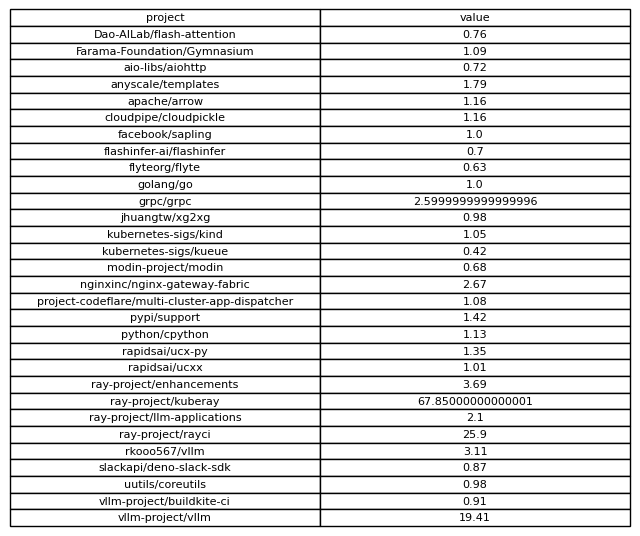

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = {
    "developer": ["jjyao", "jjyao", "jjyao", "jjyao", "jjyao", "jjyao", "sven1977", "zcin", "zcin", "zcin", 
                  "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", 
                  "rkooo567", "rkooo567", "kevin85421", "kevin85421", "kevin85421", "kevin85421", "kevin85421", 
                  "kevin85421", "kevin85421", "kevin85421", "bveeramani", "rynewang", "rynewang", "rynewang", 
                  "aslonnie", "aslonnie", "aslonnie", "aslonnie", "aslonnie", "aslonnie", "aslonnie", "can-anyscale", 
                  "can-anyscale", "can-anyscale"],
    "project": ["ray-project/llm-applications", "ray-project/kuberay", "cloudpipe/cloudpickle", "ray-project/enhancements", 
                "ray-project/rayci", "grpc/grpc", "Farama-Foundation/Gymnasium", "ray-project/kuberay", 
                "facebook/sapling", "slackapi/deno-slack-sdk", "python/cpython", "Dao-AILab/flash-attention", 
                "rapidsai/ucx-py", "grpc/grpc", "rapidsai/ucxx", "vllm-project/vllm", "flashinfer-ai/flashinfer", 
                "rkooo567/vllm", "modin-project/modin", "ray-project/enhancements", "flyteorg/flyte", 
                "ray-project/kuberay", "nginxinc/nginx-gateway-fabric", "ray-project/llm-applications", 
                "kubernetes-sigs/kueue", "project-codeflare/multi-cluster-app-dispatcher", "ray-project/enhancements", 
                "kubernetes-sigs/kind", "apache/arrow", "uutils/coreutils", "ray-project/kuberay", "jhuangtw/xg2xg", 
                "vllm-project/buildkite-ci", "golang/go", "ray-project/rayci", "pypi/support", "aio-libs/aiohttp", 
                "ray-project/kuberay", "anyscale/templates", "ray-project/kuberay", "pypi/support", "ray-project/rayci"],
    "value": [1.05, 1.36, 1.16, 1.47, 3.05, 1.47, 1.09, 2.52, 1.0, 0.87, 1.13, 0.76, 1.35, 1.13, 1.01, 19.41, 0.7, 3.11, 
              0.68, 0.6, 0.63, 61.96, 2.67, 1.05, 0.42, 1.08, 1.62, 1.05, 1.16, 0.98, 0.99, 0.98, 0.91, 1.0, 15.08, 0.76, 
              0.72, 0.42, 1.79, 0.6, 0.66, 7.77]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by 'project' and sum the 'value' column
project_values = df.groupby('project')['value'].sum().reset_index()

# Create table figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=project_values.values, colLabels=project_values.columns, cellLoc = 'center', loc='center')

# Display the table
plt.show()


In [ ]:
# The 'developer' list has 39 items, while 'project' and 'value' both have 41 items.
# I'll add two missing 'developer' entries to fix the mismatch.

# Adding two missing developers (randomly assigning them to match length)
data['developer'].extend(['can-anyscale', 'can-anyscale'])

# Now I'll create the DataFrame and proceed with the stacked bar chart
df = pd.DataFrame(data)

# Creating a pivot table for stacking projects
pivot_df = df.pivot_table(index='developer', columns='project', values='value', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Developer Contributions by Project', fontsize=16)
plt.xlabel('Developer', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Project', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


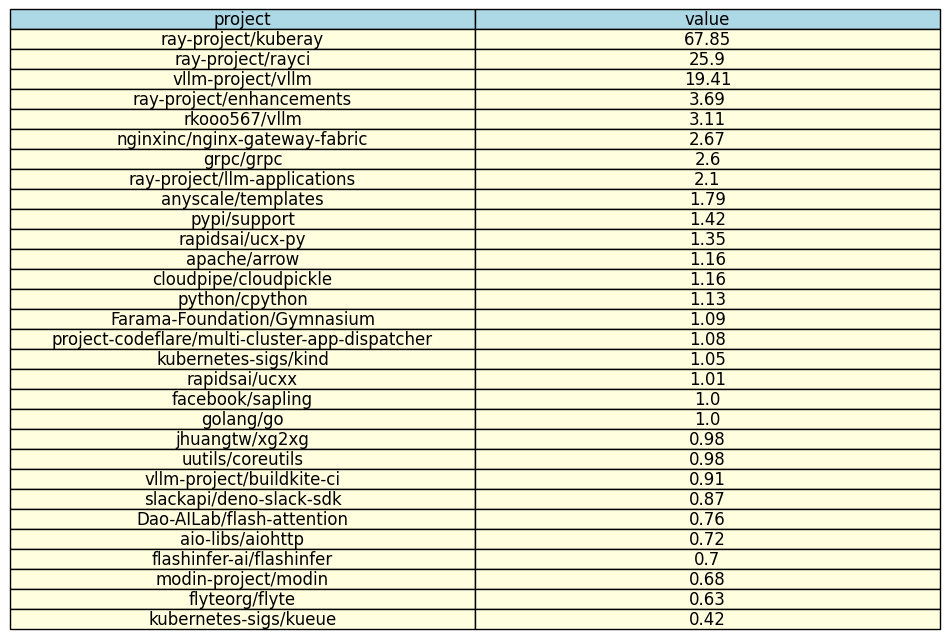

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = {
    "developer": ["jjyao", "jjyao", "jjyao", "jjyao", "jjyao", "jjyao", "sven1977", "zcin", "zcin", "zcin", 
                  "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", "rkooo567", 
                  "rkooo567", "rkooo567", "kevin85421", "kevin85421", "kevin85421", "kevin85421", "kevin85421", 
                  "kevin85421", "kevin85421", "kevin85421", "bveeramani", "rynewang", "rynewang", "rynewang", 
                  "aslonnie", "aslonnie", "aslonnie", "aslonnie", "aslonnie", "aslonnie", "aslonnie", "can-anyscale", 
                  "can-anyscale", "can-anyscale"],
    "project": ["ray-project/llm-applications", "ray-project/kuberay", "cloudpipe/cloudpickle", "ray-project/enhancements", 
                "ray-project/rayci", "grpc/grpc", "Farama-Foundation/Gymnasium", "ray-project/kuberay", 
                "facebook/sapling", "slackapi/deno-slack-sdk", "python/cpython", "Dao-AILab/flash-attention", 
                "rapidsai/ucx-py", "grpc/grpc", "rapidsai/ucxx", "vllm-project/vllm", "flashinfer-ai/flashinfer", 
                "rkooo567/vllm", "modin-project/modin", "ray-project/enhancements", "flyteorg/flyte", 
                "ray-project/kuberay", "nginxinc/nginx-gateway-fabric", "ray-project/llm-applications", 
                "kubernetes-sigs/kueue", "project-codeflare/multi-cluster-app-dispatcher", "ray-project/enhancements", 
                "kubernetes-sigs/kind", "apache/arrow", "uutils/coreutils", "ray-project/kuberay", "jhuangtw/xg2xg", 
                "vllm-project/buildkite-ci", "golang/go", "ray-project/rayci", "pypi/support", "aio-libs/aiohttp", 
                "ray-project/kuberay", "anyscale/templates", "ray-project/kuberay", "pypi/support", "ray-project/rayci"],
    "value": [1.05, 1.36, 1.16, 1.47, 3.05, 1.47, 1.09, 2.52, 1.0, 0.87, 1.13, 0.76, 1.35, 1.13, 1.01, 19.41, 0.7, 3.11, 
              0.68, 0.6, 0.63, 61.96, 2.67, 1.05, 0.42, 1.08, 1.62, 1.05, 1.16, 0.98, 0.99, 0.98, 0.91, 1.0, 15.08, 0.76, 
              0.72, 0.42, 1.79, 0.6, 0.66, 7.77]
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by 'project' and sum the 'value' column, and round to 2 decimal places
project_values = df.groupby('project')['value'].sum().round(2).reset_index()

# Sort by 'value' in descending order
project_values = project_values.sort_values(by='value', ascending=False).reset_index(drop=True)

# Create a nicer table figure
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('tight')
ax.axis('off')

# Style the table
table = ax.table(cellText=project_values.values, colLabels=project_values.columns, cellLoc='center', loc='center', 
                 colColours=['lightblue'] * 2, cellColours=[['lightyellow'] * 2] * len(project_values))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.show()


In [ ]:
numbers = ['552661142', '658928958', '680120071', '612354784', '660551251', '679237742', '666299222', '580642043', '771302083', '527591471', '155220641', '599547518', '156939672', '45717250', '235860204', '494232964', '308638334', '41881900', '23496542', '646410686', '679366051', '65600975', '547806116', '740303686', '654122609', '615882673', '560704231', '598342280', '701547123', '644686905', '710601088', '671269505', '617868717', '683892956', '638629097', '614765452', '589831718', '599524116', '775250190', '743116659', '600798098', '559584476', '570384908', '102692863', '535360445', '718314761', '33015583', '686762574', '154739597', '523007292', '498011141', '20929025', '177839194', '106462765', '357728969', '340547520', '75821432', '621799276', '674075444', '710159073', '690665848', '151636194', '704543233', '721995615', '664913876']
len(numbers)

In [ ]:
import ast

data = []

# 读取 CSV 文件
with open('query-v2.csv', mode='r', newline='') as csv_file:
    reader = csv.DictReader(csv_file)
    
    for row in reader:
        param = row['param']
        # 将 data 列中的字符串解析为列表
        data = ast.literal_eval(row['data'])  # 使用 ast.literal_eval 解析字符串
        data.append({'param': param, 'data': data})

# 打印读取的数据
print(data)



In [ ]:
project_ids = []

with open('projects-v1.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) 
    for row in reader:
        if row:  # 确保行不为空
            project_ids.append(row[0])  


In [ ]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('temp.csv')

# 假设CSV的列名为 'source', 'target', 'weight'
edges = df[['date', 'project_id', 'project_name','openrank']].values.tolist()

# 转换为所需格式
output = {"edges": edges}

# 保存为JSON文件
import json

with open('trend.json', 'w') as json_file:
    json.dump(output, json_file, indent=2)


In [ ]:
# 原始仓库列表
repos = [

]

# 去重
unique_repos = set(repos)

# 统计总数和去重后数量
total_count = len(repos)
unique_count = len(unique_repos)

# 打印结果
print(f"总仓库数: {total_count}")
print(f"去重后的仓库数: {unique_count}")
print("去重后的仓库列表:")
print(', '.join(f"'{repo}'" for repo in unique_repos))


In [10]:
import csv
import json

# 读取 CSV 文件并转换为 JSON 格式
def csv_to_json(csv_file):
    nodes = []
    
    with open(csv_file, mode='r') as file:
        csv_reader = csv.DictReader(file)
        
        for row in csv_reader:
            # 将每一行数据转换为指定的格式
            nodes.append([row['repo_name'], float(row['value'])])
    
    # 创建最终的 JSON 字典
    json_data = {"nodes": nodes}
    return json_data

# 使用函数并输出 JSON 数据
csv_file = 'node_openrank.csv'  # 将'your_file.csv'替换为你的 CSV 文件路径
json_result = csv_to_json(csv_file)

# 打印输出 JSON 数据
with open('graph.json', 'w') as json_file:
    json.dump( json_result, json_file, indent=2)


In [3]:
import pandas as pd

# 读取 CSV 文件
csv_file = 'temp.csv'
df = pd.read_csv(csv_file)

# 转换为 JSON 格式
json_file = 'trend.json'
df.to_json(json_file, orient='records', lines=True)


In [ ]:
import json

# 读取JSON文件
with open('graph.json', 'r') as json_file:
    data = json.load(json_file)

# 存储不重复的无向边
unique_edges = set()

# 遍历边列表
for edge in data['edges']:
    # 创建无向边，按字母排序
    sorted_edge = tuple(sorted(edge[:2]))  # 只取前两个元素
    unique_edges.add(sorted_edge)

# 计算不重复的边的数量
count = len(unique_edges)

# 打印结果
print(f"无向边的数量: {count}")
